<a href="https://colab.research.google.com/github/tanzeyl/Hangman/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Understanding the problem statement: To predict passesngers survived the Titanic shipwreck.

# Step 2: Hypothesis Generation: What are the factors that may affect the survival of a passenger?
Here are some answers:
1. Age.
2. Gender
3. Ticket Class
4. Cabin Number
These are just my assumptions. Let's process the data and see what it has to say.

# Step 3: Data Extraction: Files have been uploaded beforehand.

# Step 4: Data Exploration

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Let's read the data set
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Variable Identification

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Univariate analysis for continuous variables

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here, we can see that we have some missing values in our data set. We will fix that later. Also, since Pclass can only take discrete values of 1,2 and 3, let's convert it into a discrete variable.

In [8]:
data = data.astype({"Pclass":"object"})

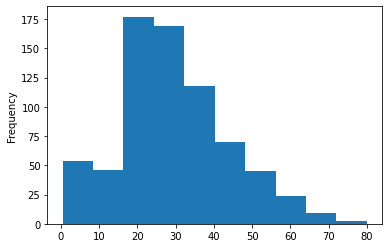

In [9]:
data["Age"].plot.hist()

Here, we can see that a  majority of the passengers were of 20-30 years of age.

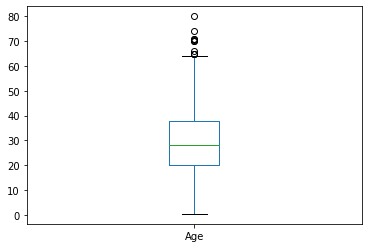

In [10]:
data["Age"].plot.box()

We have outliers in this field, let's make a list of all the columns that will have outliers. We will append their names as we come across them.

In [11]:
out = []
out.append("Age")
print(out)

['Age']


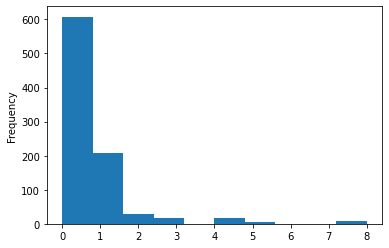

In [12]:
data["SibSp"].plot.hist()

Most of the passengers had no siblings/spouses onboard.

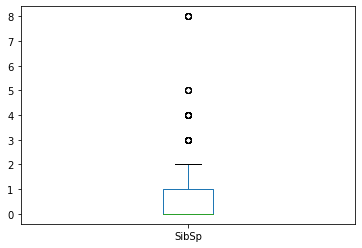

In [13]:
data["SibSp"].plot.box()

In [14]:
out.append("SibSp")
print(out)

['Age', 'SibSp']


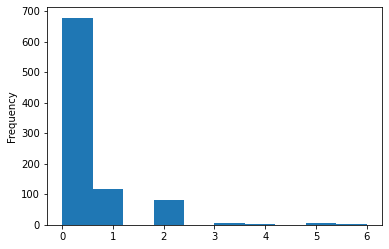

In [15]:
data["Parch"].plot.hist()

Most of the passengers had no parents/children onboard.

We will not be plotting a box-plot of the column "Parch" because of it's uneven distribution.

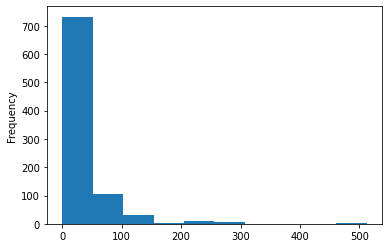

In [16]:
data["Fare"].plot.hist()

The ticket price was fairly low for most of the passengers.

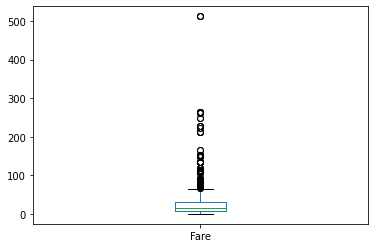

In [17]:
data["Fare"].plot.box()

In [18]:
out.append("Fare")
print(out)

['Age', 'SibSp', 'Fare']


# Univariate Analysis of Categorical Variables

In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

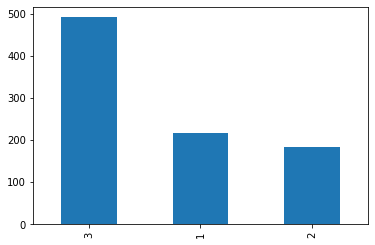

In [20]:
data["Pclass"].value_counts().plot.bar()

Most of the passesngers purchased the third class ticket.

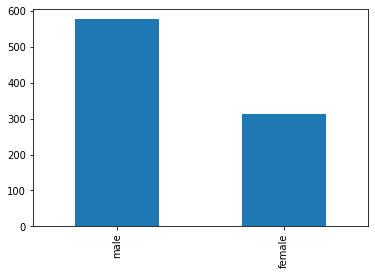

In [21]:
data["Sex"].value_counts().plot.bar()

The population of men were more than women. We will not be plotting bar chart of the column "Cabin" as that won't give us any useful information.

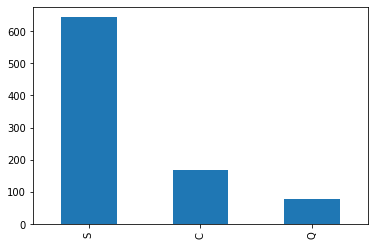

In [22]:
data["Embarked"].value_counts().plot.bar()

Most of the passengers embarked from Southamton.

# Bivariate Analysis

Since the target variable has discrete values, let's convert it into object type.

In [23]:
data = data.astype({"Survived":"object"})

Now, our target variable is a categorical variable, so we will perform categorical-continuous bivariate analysis and categorical-categorical bivariate analysis.
Proceeding with categorical-continuous bivariate analysis.

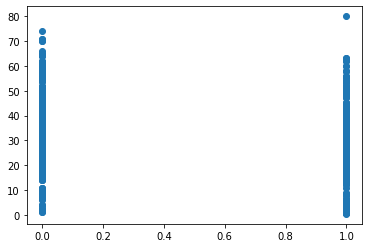

In [24]:
plt.scatter(data["Survived"], data["Age"])

In [25]:
data.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

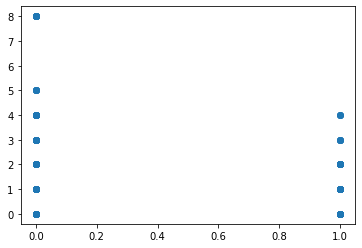

In [26]:
plt.scatter(data["Survived"], data["SibSp"])

In [27]:
data.groupby("Survived")["SibSp"].mean()

Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

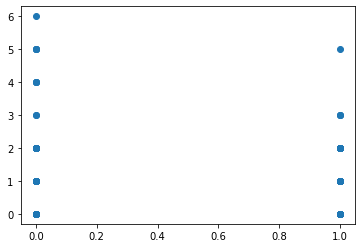

In [28]:
plt.scatter(data["Survived"], data["Parch"])

In [29]:
data.groupby("Survived")["Parch"].mean()

Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64

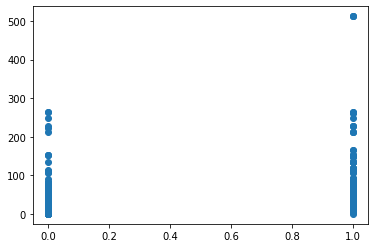

In [30]:
plt.scatter(data["Survived"], data["Fare"])

In [31]:
data.groupby("Survived")["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

# Categorical-Categorical bivariate Analysis

In [32]:
pd.crosstab(data["Survived"], data["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [33]:
pd.crosstab(data["Survived"], data["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


# Missing Value Treatment

In [34]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have missing values in age, which we will replace by the mean, in cabin and embarked which will be replaced by the mode.

In [41]:
def null(df):
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['Cabin'].fillna("G6", inplace=True)
    data['Embarked'].fillna("S", inplace=True)
    return df
null(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,G6,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,G6,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [42]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Outlier Treatment

In [44]:
print(out)

['Age', 'SibSp', 'Fare']


In [45]:
q1 = int(data.Age.quantile([0.25]))
q3 = int(data.Age.quantile([0.75]))
IQR = q3 - q1
upper_limit = int(q3+ 1.5 * IQR)
lower_limit = int(q1 - 1.5 * IQR)
print("Upper limit is {} and lower limit is {}.".format(upper_limit,lower_limit))

Upper limit is 54 and lower limit is 2.


In [62]:
data.loc[data["Age"]>upper_limit, "Age"] = np.mean(data["Age"])

In [63]:
data.loc[data["Age"]<lower_limit, "Age"] = np.mean(data["Age"])

In [48]:
q1 = int(data.SibSp.quantile([0.25]))
q3 = int(data.SibSp.quantile([0.75]))
IQR = q3 - q1
upper_limit = int(q3+ 1.5 * IQR)
lower_limit = int(q1 - 1.5 * IQR)
print("Upper limit is {} and lower limit is {}.".format(upper_limit,lower_limit))

Upper limit is 2 and lower limit is -1.


In [49]:
data.loc[data["SibSp"]>upper_limit, "SibSp"] = np.mean(data["SibSp"])

In [50]:
data.loc[data["SibSp"]<lower_limit, "SibSp"] = np.mean(data["SibSp"])

In [51]:
q1 = int(data.Fare.quantile([0.25]))
q3 = int(data.Fare.quantile([0.75]))
IQR = q3 - q1
upper_limit = int(q3+ 1.5 * IQR)
lower_limit = int(q1 - 1.5 * IQR)
print("Upper limit is {} and lower limit is {}.".format(upper_limit,lower_limit))

Upper limit is 67 and lower limit is -29.


In [66]:
data.loc[data["Fare"]>upper_limit, "Fare"] = 50

In [69]:
data.loc[data["Fare"]<0, "Fare"] = 10